In [18]:
#使用するライブラリのインポート
import codecs
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import datetime as dt
import matplotlib.pyplot as plt

In [19]:
# The code was removed by Watson Studio for sharing.

In [20]:
# APARのcsvファイルを読み込んで、Data Frame 'df' として保存
with codecs.open("apar_info.csv", "r", "utf-8", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

In [21]:
df.tail()

,APAR,STATUS,ISEV,RCOMP,SBDATE,CLOSE CODE,SEV,RREL,RCDATE,HIPER,...,ERROR DESCRIPTION,LOCAL FIX,USERS AFFECTED,PROBLEM DESCRIPTION,RECOMMENDATION,OPTIONAL ERROR DESCRIPTION,PROBLEM CONCLUSION,TEMPORARY FIX,COMMENTS,CIRCUMVENTION
32762,PI97166,'CLOSED,'3,'5635A0600,'18/04/24,'PER,'3,'R500,'18/04/24,'HIPER/Y,...,'IMS shutdown is hung.\nThe CST itask (the one...,'None.\n,'ALL IMS V15 DC MONITOR USERS\n,'IMS SHUTDOWN HUNG TRYING TO GET ACTL LATCH WH...,'INSTALL CORRECTIVE SERVICE FOR APAR/PTF\n,"'Based on timing, if the prior monitor buffer ...",'DFSFLLG0 is changed in the log record write l...,' \n,',' \n
32763,PI97167,'CLOSED,'3,'5635A0500,'18/04/24,'PER,'3,'R400,'18/04/24,'HIPER/Y,...,'IMS shutdown is hung.\nThe CST itask (the one...,'None.\n,'ALL IMS V14 DC MONITOR USERS\n,'IMS SHUTDOWN HUNG TRYING TO GET ACTL LATCH WH...,'INSTALL CORRECTIVE SERVICE FOR APAR/PTF\n,"'Based on timing, if the prior monitor buffer ...",'DFSFLLG0 is changed in the log record write l...,' \n,',' \n
32764,PI97285,'CLOSED,'2,'694235B00,'18/04/26,'PER,'2,'R3E0,'18/06/04,'HIPER/Y,...,'GDPS/Active-Active Change Master operation re...,' \n,'GDPS/Active-Active\nGDPSAA/K\n,'Following a Change Master operation\ninitiate...,'AI97285\n,' \n,'Various improvements have been made to improv...,'*********\n* HIPER *\n*********\n,','
32765,PI97491,'CLOSED,'2,'5740XYR00,'18/05/02,'PER,'2,'RB10,'18/05/02,NaN,...,'Customer has some objects in LPL/GRECP status...,"'Use DEFER ALL if possible.\nor set xxxxDBID,x...",'Db2 for z/OS V11 and V12 data sharing users.\n,'Db2 may attempt automatic GRECP\nrecovery aft...,','Db2 will periodically attempt recovery for ta...,'The automatic GRECP recovery logic has been m...,',','
32766,PI97494,'CLOSED,'2,'5740XYR00,'18/05/03,'PER,'2,'RB10,'18/05/03,NaN,...,'ABEND0C4 RC11 at DSNXRBN9 OFFSET48B2 may issu...,'n/a\n,'All Db2 11 for z/OS users running a Db2 v9\nb...,'An ABEND0C4 rc11 at DSNXGRDS DSNXRBN9\ncan oc...,','An ABEND0C4 rc11 can occur at location DSNXRB...,'Db2 code has been modified to correctly retur...,',','


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32767 entries, 0 to 32766
Data columns (total 29 columns):
APAR                          32767 non-null object
STATUS                        32767 non-null object
ISEV                          32767 non-null object
RCOMP                         32767 non-null object
SBDATE                        32767 non-null object
CLOSE CODE                    32752 non-null object
SEV                           32767 non-null object
RREL                          32767 non-null object
RCDATE                        32752 non-null object
HIPER                         11142 non-null object
SEC/INT                       13945 non-null object
FCOMP                         32753 non-null object
CLDATE                        32752 non-null object
PE                            2615 non-null object
PFREL                         32767 non-null object
FAILURE KEYWORD               32767 non-null object
MODULES/MACROS                32749 non-null object
APPLICAB

In [23]:
df.columns

Index(['APAR', 'STATUS', 'ISEV', 'RCOMP', 'SBDATE', 'CLOSE CODE', 'SEV',
       'RREL', 'RCDATE', 'HIPER', 'SEC/INT', 'FCOMP', 'CLDATE', 'PE', 'PFREL',
       'FAILURE KEYWORD', 'MODULES/MACROS', 'APPLICABLE LVL', 'ABSTRACT',
       'ERROR DESCRIPTION', 'LOCAL FIX', 'USERS AFFECTED',
       'PROBLEM DESCRIPTION', 'RECOMMENDATION', 'OPTIONAL ERROR DESCRIPTION',
       'PROBLEM CONCLUSION', 'TEMPORARY FIX', 'COMMENTS', 'CIRCUMVENTION'],
      dtype='object')

In [7]:
#APAR名の列をインデックスにする
df.set_index('APAR',drop=True,inplace=True)

In [8]:
#日付のフォーマットをDataFrameのフォーマットに変換
df["SBDATE"] = pd.to_datetime(df["SBDATE"],format="'%y/%m/%d")
df["RCDATE"] = pd.to_datetime(df["RCDATE"],format="'%y/%m/%d")
df["CLDATE"] = pd.to_datetime(df["CLDATE"],format="'%y/%m/%d")

In [9]:
df[['SBDATE','RCDATE','CLDATE']].head(10)

,SBDATE,RCDATE,CLDATE
APAR,,,
II12465,2000-07-18,NaT,NaT
II13912,2004-07-27,NaT,NaT
II14224,2006-09-27,NaT,NaT
II14366,2008-02-15,NaT,NaT
OA31527,2009-12-23,2009-12-29,2010-01-08
OA31538,2010-01-05,2010-01-06,2010-01-13
PK97721,2009-10-02,2009-10-02,2010-01-08
PK98333,2009-10-09,2009-10-12,2010-01-04
PM00628,2009-11-05,2009-11-06,2010-01-04


In [9]:
#PE,HIPER列をカウント
print(df['PE'].value_counts())
print(df['HIPER'].value_counts())

'PE/Y    2615
Name: PE, dtype: int64
'HIPER/Y    11142
Name: HIPER, dtype: int64


In [10]:
#PE、HIPERの列について、PE,HIPERに該当する値を1に変換する
df['PE'] = df['PE'].str.replace("'PE/Y", "1")
df['HIPER'] = df['HIPER'].str.replace("'HIPER/Y", "1")

#PE、HIPERの列について、値が入っていないNaNを、0に変換する
df['PE'] = df['PE'].fillna(0)
df['HIPER'] = df['HIPER'].fillna(0)

#PE、HIPERの列について、0,1 の値をboolean形式に変換する
df['PE'] = df['PE'].astype(bool)
df['HIPER'] = df['HIPER'].astype(bool)

In [12]:
df[['PE','HIPER']].head(10)

,PE,HIPER
APAR,,
II12465,False,False
II13912,False,False
II14224,False,False
II14366,False,False
OA31527,False,False
OA31538,True,False
PK97721,False,True
PK98333,False,True
PM00628,False,True


In [11]:
# 修正までの日数を列に追加。（列名を要確認）
df['days_to_aparclose'] = df['CLDATE']-df['SBDATE']
df['days_to_aparclose'] = df['days_to_aparclose'].dt.days

In [12]:
df['days_to_aparclose'].describe()

count    32752.000000
mean        68.274670
std         85.006693
min          0.000000
25%         20.000000
50%         44.000000
75%         84.000000
max       1535.000000
Name: days_to_fix, dtype: float64

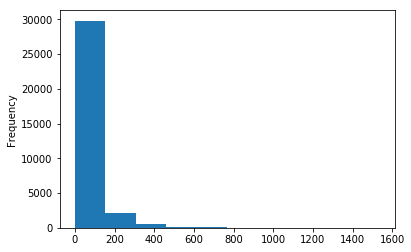

In [13]:
#修正までの日数をプロットしてみる
df['days_to_fix'].plot.hist()

In [14]:
#SEVの列の' を削除。それぞれに対応する変数列を追加
df['SEV'] = df['SEV'].str.replace("'", "")
df = pd.get_dummies(df, columns=["SEV"])

In [15]:
# 列同士の相関関係を表示
df.corr()

,HIPER,PE,days_to_fix,SEV_1,SEV_2,SEV_3,SEV_4
HIPER,1.000000,0.054869,-0.016307,0.179287,0.174514,-0.156251,-0.155212
PE,0.054869,1.000000,-0.090033,0.045457,0.156680,-0.130418,-0.074121
days_to_fix,-0.016307,-0.090033,1.000000,-0.056484,-0.061952,0.033060,0.085660
SEV_1,0.179287,0.045457,-0.056484,1.000000,-0.197526,-0.193619,-0.080327
SEV_2,0.174514,0.156680,-0.061952,-0.197526,1.000000,-0.725419,-0.300955
SEV_3,-0.156251,-0.130418,0.033060,-0.193619,-0.725419,1.000000,-0.295003
SEV_4,-0.155212,-0.074121,0.085660,-0.080327,-0.300955,-0.295003,1.000000


In [16]:
df.head()

,STATUS,ISEV,RCOMP,SBDATE,CLOSE CODE,RREL,RCDATE,HIPER,SEC/INT,FCOMP,...,OPTIONAL ERROR DESCRIPTION,PROBLEM CONCLUSION,TEMPORARY FIX,COMMENTS,CIRCUMVENTION,days_to_fix,SEV_1,SEV_2,SEV_3,SEV_4
APAR,,,,,,,,,,,,,,,,,,,,,
II12465,'INTRAN,'4,'INFOPBLIB,2000-07-18,NaN,'R001,NaT,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
II13912,'INTRAN,'4,'INFOPBLIB,2004-07-27,NaN,'R001,NaT,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
II14224,'INTRAN,'4,'INFOPBLIB,2006-09-27,NaN,'R001,NaT,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
II14366,'INTRAN,'4,'INFOPBLIB,2008-02-15,NaN,'R001,NaT,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
OA31527,'CLOSED,'3,'5752SC1BH,2009-12-23,'PER,'R708,2009-12-29,False,'N,'5752SC1BH,...,'Due to a lack of an IXZXIXCL invocation for t...,'TYPE/RESTART(WARM) IPL/REQUIRED(YES) CLPA(YES...,'*** * TEMPORARY FIX MAY BE OBTAINED FROM DLL ...,'\n\n\n,'\n\n\n,16.0,0,0,1,0


In [17]:
#修正までに1年以上掛かっている件数をカウント
print('1年以上掛かってる件数',len(df[df['days_to_fix'] > 365]))

1年以上掛かってる件数 494


In [27]:
df['RCOMP'].value_counts()

'5740XYR00    8112
'5635A0400    1446
'5635A0300    1185
'5655R3600     940
'5635A0200     846
'5655Y0400     783
'694235B00     641
'5655OPE00     626
'5635A0100     614
'5655S9700     568
'5655HAL00     521
'5697WSZ01     495
'5655W9700     469
'5635A0500     460
'5697I8200     325
'5698SA300     311
'568851500     306
'5655X0100     283
'5697F4400     258
'5695DF117     248
'5655W3200     234
'5655Q1200     233
'5695DF122     222
'5608A2800     206
'5752SC1BH     205
'5695DF115     205
'568819812     204
'5752SC1CR     198
'5698A3900     197
'5752SC1C3     193
              ... 
'5695DF118       1
'5655D4403       1
'5655N6001       1
'5725A54ST       1
'566534801       1
'565516201       1
'566528504       1
'5695SCPX7       1
'5698A9800       1
'5695OICLI       1
'564806300       1
'5698B1800       1
'5655S1600       1
'5724J0852       1
'5655N0255       1
'5655T6200       1
'5697N4200       1
'5655Y2900       1
'5698SOA00       1
'5655QCR01       1
'5752SC1B5       1
'5655E7201  